In [1]:
# Load modules
from __future__ import print_function
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
import statsmodels.tsa.api as smtsa
from statsmodels.tsa import arima_process

In [4]:
# Function to plot signal, ACF and PACF
def plotds(xt, nlag=30, fig_size=(12, 10)):
    if not isinstance(xt, pd.Series):
         xt = pd.Series(xt)
    plt.figure(figsize=fig_size)
    layout = (2, 2)
    
    # Assign axes
    ax_xt = plt.subplot2grid(layout, (0, 0), colspan=2)
    ax_acf= plt.subplot2grid(layout, (1, 0))
    ax_pacf = plt.subplot2grid(layout, (1, 1))
    
    # Plot graphs
    xt.plot(ax=ax_xt)
    ax_xt.set_title('Time Series')
    plot_acf(xt, lags=50, ax=ax_acf)
    plot_pacf(xt, lags=50, ax=ax_pacf)
    plt.tight_layout()
    return None

In [11]:
# Number of samples
n = 600

Text(0.5,69,'Lag')

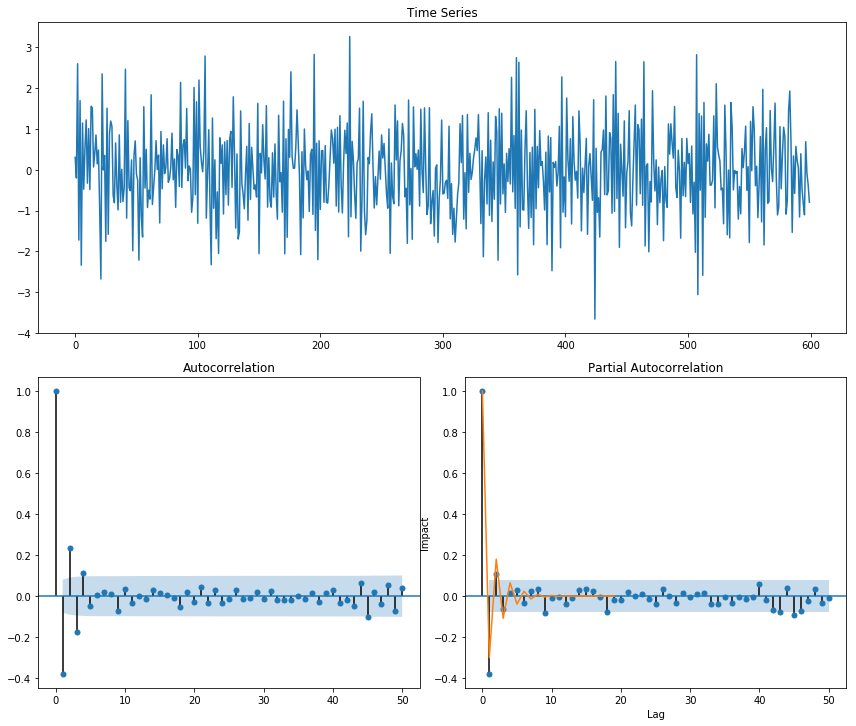

In [12]:
# Generate AR(1) dataset
ar = np.r_[1, 0.6]
ma = np.r_[1, 0.3]
ar1ma1_data = smtsa.arma_generate_sample(ar=ar, ma=ma, nsample=n) 
plotds(ar1ma1_data )

# Impluse response curve
plt.plot(arima_process.arma_impulse_response(ar, ma, nobs=20))
plt.ylabel("Impact")
plt.xlabel("Lag")

In [13]:
# Build AR(1) model
ar1ma1 = smtsa.ARMA(ar1ma1_data.tolist(), order=(1, 1)).fit(
    maxlag=30, method='mle', trend='nc')
ar1ma1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  600
Model:                     ARMA(1, 1)   Log Likelihood                -844.840
Method:                           mle   S.D. of innovations              0.989
Date:                Wed, 14 Aug 2019   AIC                           1695.679
Time:                        14:10:02   BIC                           1708.870
Sample:                             0   HQIC                          1700.814
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y       -0.6475      0.075     -8.607      0.000      -0.795      -0.500
ma.L1.y        0.3210      0.093      3.434      0.001       0.138       0.504
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.5443           +0.0000j            1.5443            0.5000
MA.1           -3.1151           +0.0000j            3.1151            0.5000
-----------------------------------------------------------------------------
"""

In [17]:
# Optimize ARMA parameters
aicVal=[]
for ari in range(1, 3):
    for maj in range(1,3):
        arma_obj = smtsa.ARMA(ar1ma1_data.tolist(), order=(ari, maj)).fit(maxlag=30, method='mle', trend='nc')
        aicVal.append([ari, maj, arma_obj.aic])

In [18]:
print(aicVal)

[[1, 1, 1695.6793238887599], [1, 2, 1697.6089052506281], [2, 1, 1697.6249477178305], [2, 2, 1699.4812671412353]]


In [ ]:
# select smallest aic, which is ARMA(1, 1)